In [2]:
import pandas as pd
df1 = pd.read_csv('data_jun.csv')
df1.head()

,year,futoko_rate_jun,stu_per_tch_jun,classes_jun,rate_jun,rate_OII_jun,rate_Lve_jun
0,1991,1.04,18.08,3150,4.2,0.004,1.33
1,1992,1.16,17.81,3150,5.0,0.004,1.39
2,1993,1.24,17.43,3150,6.0,0.006,1.40
3,1994,1.32,17.11,3150,8.0,0.004,1.37
4,1995,1.42,16.86,3150,8.8,0.004,1.37


In [3]:
#欠損値の確認
df1.isnull().sum()

year               0
futoko_rate_jun    0
stu_per_tch_jun    0
classes_jun        0
rate_jun           0
rate_OII_jun       0
rate_Lve_jun       0
dtype: int64

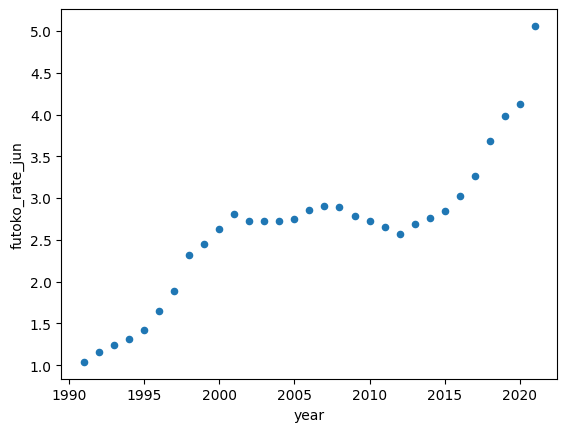

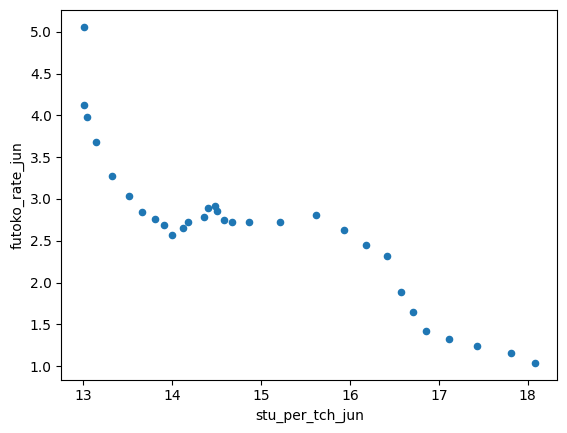

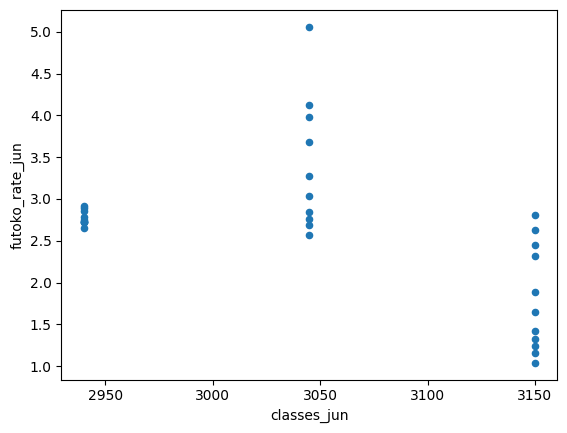

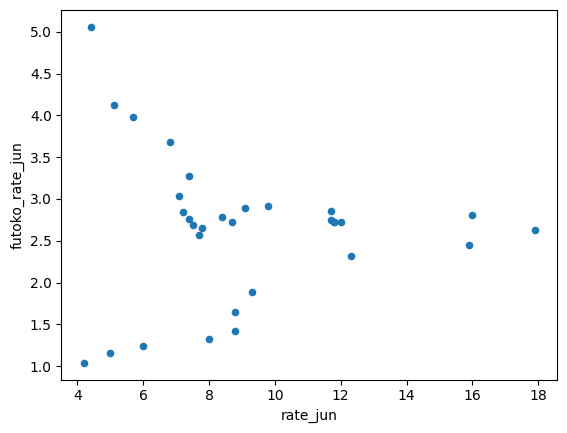

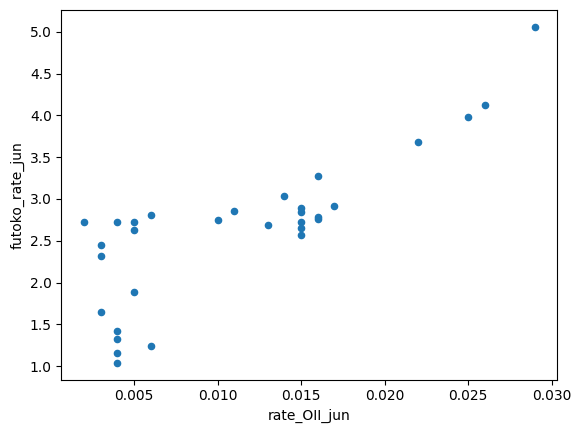

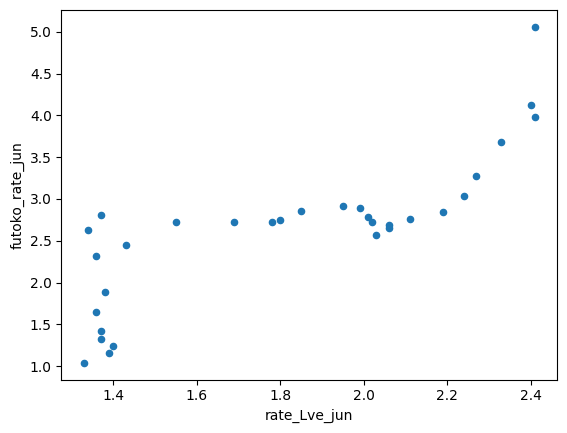

In [4]:
#散布図で相関を見てみる
for i in df1.columns:
    if i == 'futoko_rate_jun':
        continue
    df1.plot(kind = 'scatter', x = i, y = 'futoko_rate_jun')

In [6]:
#標準化する
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df1)
sc_df1 = sc.transform(df1)
sc_df1 = pd.DataFrame(sc_df1, columns = df1.columns)
sc_df1.head()

,year,futoko_rate_jun,stu_per_tch_jun,classes_jun,rate_jun,rate_OII_jun,rate_Lve_jun
0,-1.677051,-1.833918,2.060682,1.176697,-1.459897,-0.962980,-1.275417
1,-1.565248,-1.695985,1.880885,1.176697,-1.220285,-0.962980,-1.117476
2,-1.453444,-1.604029,1.627837,1.176697,-0.920769,-0.696441,-1.091153
3,-1.341641,-1.512074,1.414745,1.176697,-0.321738,-0.962980,-1.170123
4,-1.229837,-1.397130,1.248266,1.176697,-0.082125,-0.962980,-1.170123


In [10]:
#多項式特徴量、交互作用特徴量を出してみる
from sklearn.preprocessing import PolynomialFeatures
sc_df2 = sc_df1.loc[:, 'stu_per_tch_jun':]
poly = PolynomialFeatures(degree = 2)
sc_df3 = poly.fit_transform(sc_df2)
poly.get_feature_names_out()

array(['1', 'stu_per_tch_jun', 'classes_jun', 'rate_jun', 'rate_OII_jun',
       'rate_Lve_jun', 'stu_per_tch_jun^2', 'stu_per_tch_jun classes_jun',
       'stu_per_tch_jun rate_jun', 'stu_per_tch_jun rate_OII_jun',
       'stu_per_tch_jun rate_Lve_jun', 'classes_jun^2',
       'classes_jun rate_jun', 'classes_jun rate_OII_jun',
       'classes_jun rate_Lve_jun', 'rate_jun^2', 'rate_jun rate_OII_jun',
       'rate_jun rate_Lve_jun', 'rate_OII_jun^2',
       'rate_OII_jun rate_Lve_jun', 'rate_Lve_jun^2'], dtype=object)

In [11]:
#先ほど出した多項式特徴量、交互作用特徴量をデータフレームにする
sc_df4 = pd.DataFrame(sc_df3, columns = ['1', 'stu_per_tch_jun', 'classes_jun', 'rate_jun', 'rate_OII_jun',
       'rate_Lve_jun', 'stu_per_tch_jun^2', 'stu_per_tch_jun classes_jun',
       'stu_per_tch_jun rate_jun', 'stu_per_tch_jun rate_OII_jun',
       'stu_per_tch_jun rate_Lve_jun', 'classes_jun^2',
       'classes_jun rate_jun', 'classes_jun rate_OII_jun',
       'classes_jun rate_Lve_jun', 'rate_jun^2', 'rate_jun rate_OII_jun',
       'rate_jun rate_Lve_jun', 'rate_OII_jun^2',
       'rate_OII_jun rate_Lve_jun', 'rate_Lve_jun^2'])
sc_df4.head()

,1,stu_per_tch_jun,classes_jun,rate_jun,rate_OII_jun,rate_Lve_jun,stu_per_tch_jun^2,stu_per_tch_jun classes_jun,stu_per_tch_jun rate_jun,stu_per_tch_jun rate_OII_jun,...,classes_jun^2,classes_jun rate_jun,classes_jun rate_OII_jun,classes_jun rate_Lve_jun,rate_jun^2,rate_jun rate_OII_jun,rate_jun rate_Lve_jun,rate_OII_jun^2,rate_OII_jun rate_Lve_jun,rate_Lve_jun^2
0,1.0,2.060682,1.176697,-1.459897,-0.962980,-1.275417,4.246408,2.424797,-3.008383,-1.984395,...,1.384615,-1.717856,-1.133136,-1.500780,2.131300,1.405852,1.861978,0.927331,1.228202,1.626690
1,1.0,1.880885,1.176697,-1.220285,-0.962980,-1.117476,3.537727,2.213231,-2.295215,-1.811254,...,1.384615,-1.435905,-1.133136,-1.314931,1.489095,1.175110,1.363639,0.927331,1.076107,1.248753
2,1.0,1.627837,1.176697,-0.920769,-0.696441,-1.091153,2.649855,1.915471,-1.498862,-1.133693,...,1.384615,-1.083466,-0.819500,-1.283956,0.847816,0.641261,1.004700,0.485030,0.759923,1.190614
3,1.0,1.414745,1.176697,-0.321738,-0.962980,-1.170123,2.001503,1.664726,-0.455177,-1.362371,...,1.384615,-0.378588,-1.133136,-1.376880,0.103515,0.309827,0.376473,0.927331,1.126805,1.369189
4,1.0,1.248266,1.176697,-0.082125,-0.962980,-1.170123,1.558169,1.468831,-0.102514,-1.202056,...,1.384615,-0.096637,-1.133136,-1.376880,0.006745,0.079085,0.096097,0.927331,1.126805,1.369189


In [12]:
#'futoko_rate_jun’を戻して'1'を削除
sc_df4['futoko_rate_jun'] = sc_df1['futoko_rate_jun']
sc_df4 = sc_df4.drop(['1'], axis = 1)
sc_df4.head()


,stu_per_tch_jun,classes_jun,rate_jun,rate_OII_jun,rate_Lve_jun,stu_per_tch_jun^2,stu_per_tch_jun classes_jun,stu_per_tch_jun rate_jun,stu_per_tch_jun rate_OII_jun,stu_per_tch_jun rate_Lve_jun,...,classes_jun rate_jun,classes_jun rate_OII_jun,classes_jun rate_Lve_jun,rate_jun^2,rate_jun rate_OII_jun,rate_jun rate_Lve_jun,rate_OII_jun^2,rate_OII_jun rate_Lve_jun,rate_Lve_jun^2,futoko_rate_jun
0,2.060682,1.176697,-1.459897,-0.962980,-1.275417,4.246408,2.424797,-3.008383,-1.984395,-2.628229,...,-1.717856,-1.133136,-1.500780,2.131300,1.405852,1.861978,0.927331,1.228202,1.626690,-1.833918
1,1.880885,1.176697,-1.220285,-0.962980,-1.117476,3.537727,2.213231,-2.295215,-1.811254,-2.101844,...,-1.435905,-1.133136,-1.314931,1.489095,1.175110,1.363639,0.927331,1.076107,1.248753,-1.695985
2,1.627837,1.176697,-0.920769,-0.696441,-1.091153,2.649855,1.915471,-1.498862,-1.133693,-1.776219,...,-1.083466,-0.819500,-1.283956,0.847816,0.641261,1.004700,0.485030,0.759923,1.190614,-1.604029
3,1.414745,1.176697,-0.321738,-0.962980,-1.170123,2.001503,1.664726,-0.455177,-1.362371,-1.655426,...,-0.378588,-1.133136,-1.376880,0.103515,0.309827,0.376473,0.927331,1.126805,1.369189,-1.512074
4,1.248266,1.176697,-0.082125,-0.962980,-1.170123,1.558169,1.468831,-0.102514,-1.202056,-1.460626,...,-0.096637,-1.133136,-1.376880,0.006745,0.079085,0.096097,0.927331,1.126805,1.369189,-1.397130


In [13]:
#相関係数を出してみる
abs(sc_df4.corr()['futoko_rate_jun']).sort_values(ascending = False)

futoko_rate_jun                 1.000000
stu_per_tch_jun                 0.888902
stu_per_tch_jun classes_jun     0.824743
rate_OII_jun                    0.817131
rate_Lve_jun                    0.814162
rate_jun rate_OII_jun           0.750320
stu_per_tch_jun rate_jun        0.748279
rate_jun rate_Lve_jun           0.650250
classes_jun rate_Lve_jun        0.642985
rate_OII_jun^2                  0.584084
classes_jun^2                   0.551789
classes_jun                     0.471835
classes_jun rate_OII_jun        0.470770
rate_OII_jun rate_Lve_jun       0.446271
stu_per_tch_jun^2               0.383114
classes_jun rate_jun            0.220245
rate_Lve_jun^2                  0.217163
stu_per_tch_jun rate_OII_jun    0.192585
stu_per_tch_jun rate_Lve_jun    0.109086
rate_jun                        0.067452
rate_jun^2                      0.054991
Name: futoko_rate_jun, dtype: float64

In [21]:
#特徴量と正解データに分割
col = ['rate_OII_jun', 'classes_jun^2']
x = sc_df4[col]
t = sc_df4['futoko_rate_jun']

In [22]:
#訓練データとテストデータの分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,t, test_size = 0.2, random_state = 0)

#モデルを作成し学習させる
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) 

LinearRegression()

In [23]:
#決定係数を出してみる
model.score(x_test, y_test)

0.6379012689116574